In [31]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
conn = sqlite3.connect('C:\\Users\\lahat\\Downloads\\FPA_FOD_20170508.sqlite')
df = pd.read_sql_query("SELECT * from Fires", conn)

In [18]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,463445,497959,SFO-ID0043_3101998026,NONFED,ST-NASF,ST/C&L,USIDIDS,Idaho Department of Lands,ID310,IDS District 310,...,B,47.600845,-116.306789,14.0,MISSING/NOT SPECIFIED,ID,Kootenai,055,Kootenai,b'\x00\x01\xad\x10\x00\x00pqTn\xa2\x13]\xc0\x9...
1,1464479,201104109,W-626311,FED,DOI-WFMI,BIA,USMTFBA,Fort Belknap Agency,MTFBA,Fort Belknap Agency,...,A,48.403300,-108.289600,8.0,PRIVATE,MT,None,None,None,b'\x00\x01\xad\x10\x00\x00\xf8:p\xce\x88\x12[\...
2,1591094,201608816,SFO-NE-2012-16029,NONFED,ST-NASF,ST/C&L,USNENES,Nebraska Department of Forestry,NENFS,Nebraska Forest Service,...,B,40.668460,-99.089130,14.0,MISSING/NOT SPECIFIED,NE,None,None,None,b'\x00\x01\xad\x10\x00\x00\xe8\xc5PN\xb4\xc5X\...
3,944726,1072277,SWRA_VA_11300,NONFED,ST-VAVAS,ST/C&L,USVAVAS,Virginia Department of Forestry,VAVAS3,Farmville District,...,B,39.000000,-78.269200,14.0,MISSING/NOT SPECIFIED,VA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\x05\xa3\x92:\x91S\...
4,896277,1022153,SWRA_LA_24392,NONFED,ST-LALAS,ST/C&L,USLALAS,Louisiana Office of Forestry,LALAS1,LAS District 1,...,B,30.993300,-89.863900,14.0,MISSING/NOT SPECIFIED,LA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xe8\xc09#JwV\xc0\xf...


In [19]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [20]:
### Cause and code are injective (one-to-one)
df[['STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR']].drop_duplicates()

,STAT_CAUSE_CODE,STAT_CAUSE_DESCR
0,13.0,Missing/Undefined
1,9.0,Miscellaneous
4,7.0,Arson
5,5.0,Debris Burning
6,3.0,Smoking
8,4.0,Campfire
12,2.0,Equipment Use
17,11.0,Powerline
22,1.0,Lightning
33,6.0,Railroad


In [21]:
### Each team member got 1/3 of the columns to decide which to keep/drop and why
df.iloc[:, 26:].head()

,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,NaN,None,2.0,B,47.600845,-116.306789,14.0,MISSING/NOT SPECIFIED,ID,Kootenai,055,Kootenai,b'\x00\x01\xad\x10\x00\x00pqTn\xa2\x13]\xc0\x9...
1,234.0,1800,0.1,A,48.403300,-108.289600,8.0,PRIVATE,MT,None,None,None,b'\x00\x01\xad\x10\x00\x00\xf8:p\xce\x88\x12[\...
2,140.0,1630,1.5,B,40.668460,-99.089130,14.0,MISSING/NOT SPECIFIED,NE,None,None,None,b'\x00\x01\xad\x10\x00\x00\xe8\xc5PN\xb4\xc5X\...
3,NaN,None,2.0,B,39.000000,-78.269200,14.0,MISSING/NOT SPECIFIED,VA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\x05\xa3\x92:\x91S\...
4,NaN,None,5.0,B,30.993300,-89.863900,14.0,MISSING/NOT SPECIFIED,LA,None,None,None,b'\x00\x01\xad\x10\x00\x00\xe8\xc09#JwV\xc0\xf...


In [22]:
## these are the same, and if one is none the rest are also none
df['COUNTY'] = df['COUNTY'].str.lower().str.strip()
df['FIPS_NAME'] = df['FIPS_NAME'].str.lower().str.strip()
df['FIPS_CODE'] = df['FIPS_CODE'].str.lower().str.strip()
count_fips = df[['COUNTY','FIPS_NAME', 'FIPS_CODE']].dropna()
count_fips[(count_fips['COUNTY']!=count_fips['FIPS_NAME'])&
           (count_fips['COUNTY']!=count_fips['FIPS_CODE'])&
           (count_fips['FIPS_CODE']!=count_fips['FIPS_NAME'])].head(10)

,COUNTY,FIPS_NAME,FIPS_CODE
9,31,cook,031
22,17,navajo,017
25,orangeburg county,orangeburg,075
32,19,douglas,019
35,st lawrence,st. lawrence,089
53,jf,jefferson,073
56,5,coconino,005
66,47,okanogan,047
71,69,waupaca,135
72,stevens county,stevens,065


In [23]:
df_fires = df.drop(columns=['OBJECTID','FOD_ID', 'FPA_ID', 'SOURCE_REPORTING_UNIT_NAME', 
                      'LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID','FIRE_CODE', 
                      'FIRE_NAME','ICS_209_INCIDENT_NUMBER','ICS_209_NAME', 
                      'MTBS_ID', 'MTBS_FIRE_NAME', 'DISCOVERY_DATE', 'CONT_DATE',
                      'FIPS_CODE', 'FIPS_NAME', 'Shape'
                     ])
df_fires.columns

Index(['SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY',
       'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME',
       'SOURCE_REPORTING_UNIT', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DOY',
       'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY'],
      dtype='object')

In [24]:
## basic string cleaning
df_fires = df_fires.fillna(value=np.nan)
df_fires = df_fires.replace(to_replace='', value=np.nan)

In [25]:
## state exploration
df_fires['STATE'] = df_fires['STATE'].str.upper()
lst_states = list(df_fires['STATE'].unique())
len(lst_states)

52

In [26]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
len(states)

51

In [27]:
## PR state is not existing (ask shifter if its real). If it is, we will remove the rows with PR
for state in lst_states:
    if state not in states:
        print(state)

PR


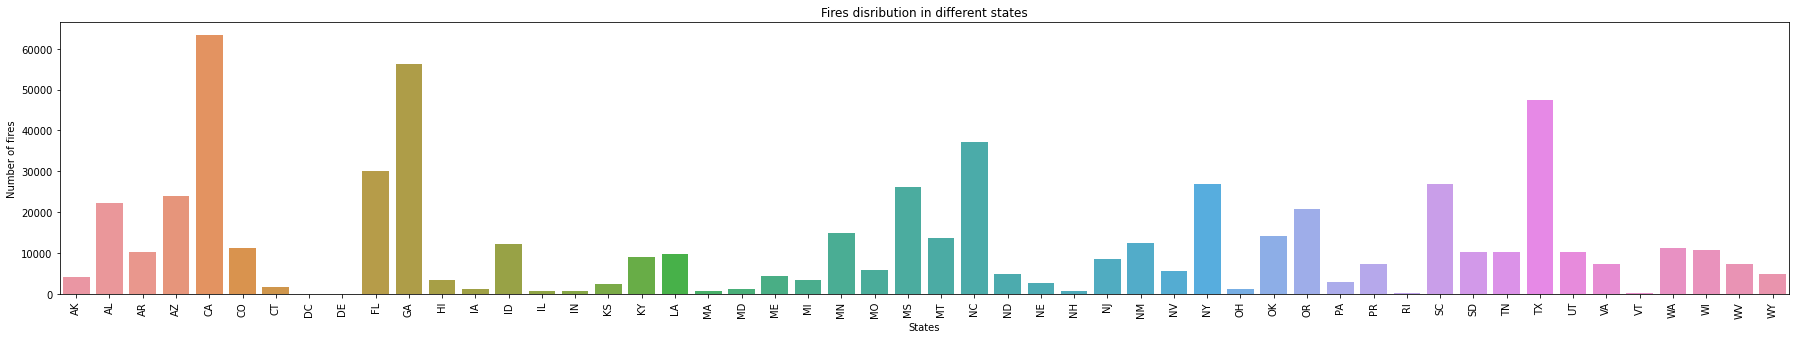

In [38]:
plt.figure(figsize=(31,5))
sns.countplot(data=df_fires, x=df_fires['STATE'], order=np.sort(df_fires['STATE'].unique()))
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Number of fires")
plt.title("Fires disribution in different states")
plt.show()

In [39]:
## overseeing staff exploration
SST = "SOURCE_SYSTEM_TYPE"
NRA = "NWCG_REPORTING_AGENCY"
df_fires[SST].nunique()  # categorial feature - NON FED, FED, INT AGNCY

3

In [40]:
df_fires[NRA].nunique()

11

In [41]:
NRA_VALUES = np.unique(df_fires[NRA])
NRA_VALUES

array(['BIA', 'BLM', 'BOR', 'DOD', 'DOE', 'FS', 'FWS', 'IA', 'NPS',
       'ST/C&L', 'TRIBE'], dtype=object)

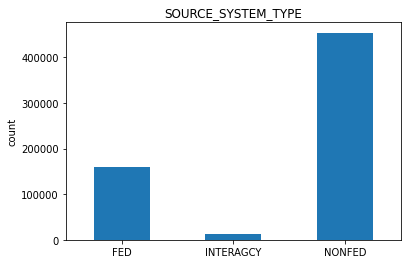

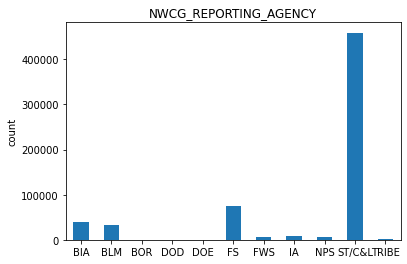

In [42]:
## the majority of NWCG REPORTING AGENCY is a State.
for col in [SST, NRA]:
    df_fires[col].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count', title=col)
    plt.show()

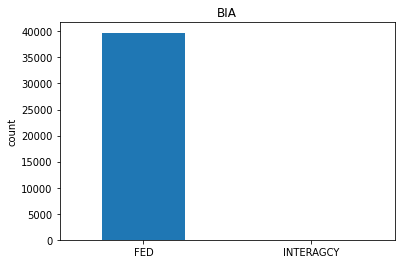

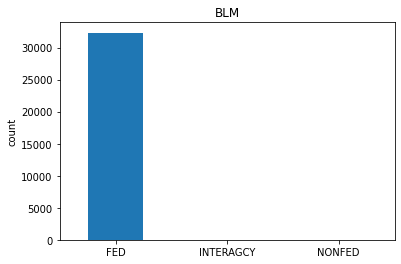

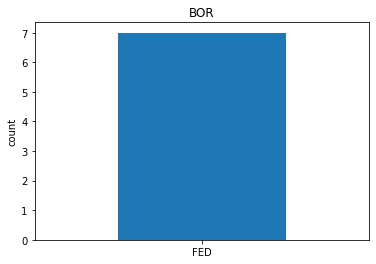

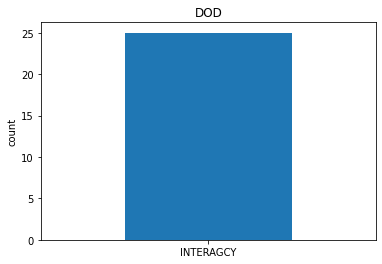

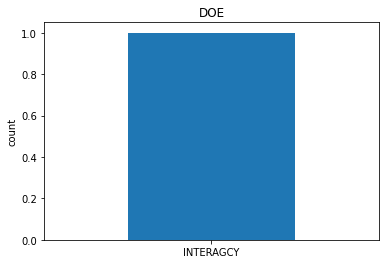

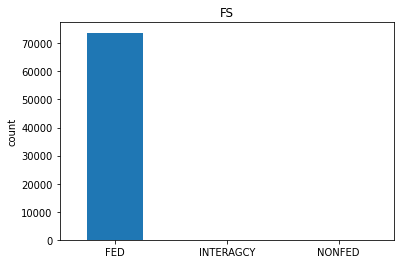

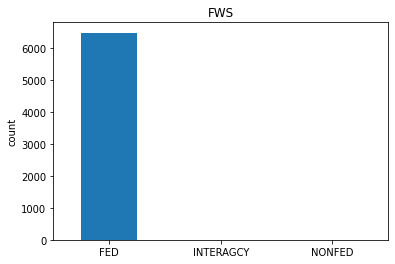

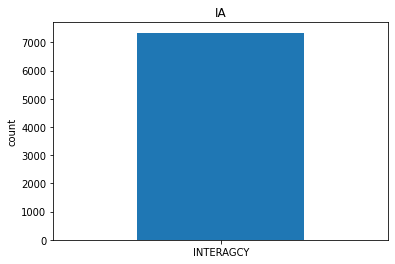

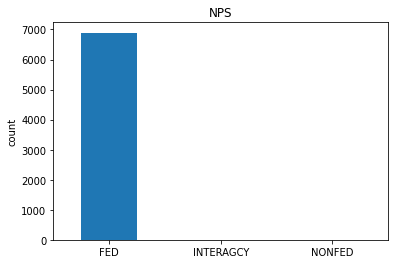

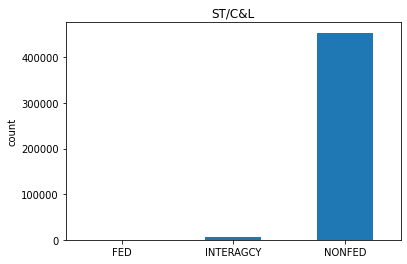

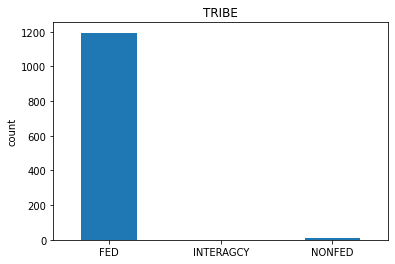

In [43]:
## the most SOURCE SYSTEM TYPE of ST/C&L (State unit reporting the fire report) is NONFED, maybe see the connection with nonfed to cause fire and see if it is the same in this case
for val in NRA_VALUES:
    df_fires[df_fires[NRA] == val][SST].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count', title=val)
    plt.show()

In [45]:
## datetime formatsssss
df_fires['FIRE_YEAR'] = pd.to_datetime(df_fires.FIRE_YEAR, format='%Y').dt.year

df_fires['DISCOVERY_TIME'] = df_fires['DISCOVERY_TIME'].apply(lambda x: ''.join([str(x)[:2],':',str(x)[2:]]) if pd.notnull(x) else np.nan)
df_fires['DISCOVERY_TIME'] = pd.to_datetime(df_fires['DISCOVERY_TIME'], format="%H:%M").dt.time

df_fires['CONT_TIME'] = df_fires['CONT_TIME'].apply(lambda x: ''.join([str(x)[:2],':',str(x)[2:]]) if pd.notnull(x) else np.nan)
df_fires['CONT_TIME'] = pd.to_datetime(df_fires['CONT_TIME'], format="%H:%M").dt.time

## how to use this day of year?
#df_fires['DISCOVERY_DOY'] = pd.to_datetime(df_fires['DISCOVERY_DOY'], format="%j")
#dt(df_fires['FIRE_YEAR'], 1, 1) + dt.timedelta(df_fires['DISCOVERY_DOY'] - 1)


In [46]:
## no NaNs - fire size, fire size class, lat, long, state, fire year, owner code, owner desc, discovery doy

## maybe fill in contatinment times by avg of cont_time per fire_size_class
df_fires[df_fires['CONT_DOY'].notnull() & df_fires['CONT_TIME'].isna()][['DISCOVERY_DOY', 'DISCOVERY_TIME', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS']].head(20)

,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS
19,240,13:25:00,240.0,NaT,1.00,B
75,71,18:08:00,72.0,NaT,0.01,A
90,73,NaT,73.0,NaT,36.00,C
217,103,NaT,103.0,NaT,5.00,B
223,181,NaT,181.0,NaT,2.00,B
258,236,13:00:00,236.0,NaT,19.00,C
261,136,00:00:00,136.0,NaT,0.13,A
286,148,NaT,149.0,NaT,0.15,A
290,69,18:30:00,70.0,NaT,20.00,C
292,206,12:14:00,213.0,NaT,200.00,D
